In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.shape

(2126, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

# Delete duplicate records

In [7]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [8]:
# resetting the index value
df_clean = df.drop_duplicates().reset_index()
df_clean = df_clean.drop(['index'],axis=1)
df_clean

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2120,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2121,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2122,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Imputation

In [9]:
df_clean.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [10]:
#replace missing values with their average column value for each record having null values
for i in df_clean.columns:
    mean = df_clean[i].mean()
    df_clean[i] = df_clean[i].fillna(mean)

In [11]:
df_clean.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.736420,42.726905,0.642653,0.641660
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [12]:
df_clean.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063452,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.104658,0.234720,0.031896,-0.312189
FM,0.018809,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018408,0.073991
UC,-0.166642,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.185542
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023759,0.025095
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036652,-0.094634
ALTV,0.210673,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036504,0.365218


# Outlier detection

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

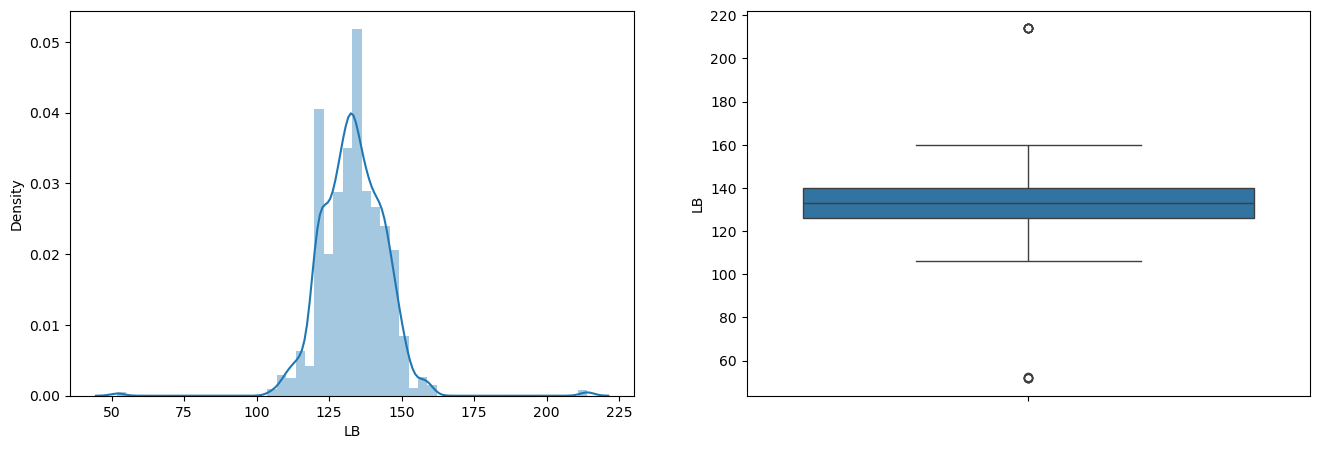

In [14]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.LB)

plt.subplot(1,2,2)
sns.boxplot(df_clean.LB)
plt.show()

<Axes: ylabel='AC'>

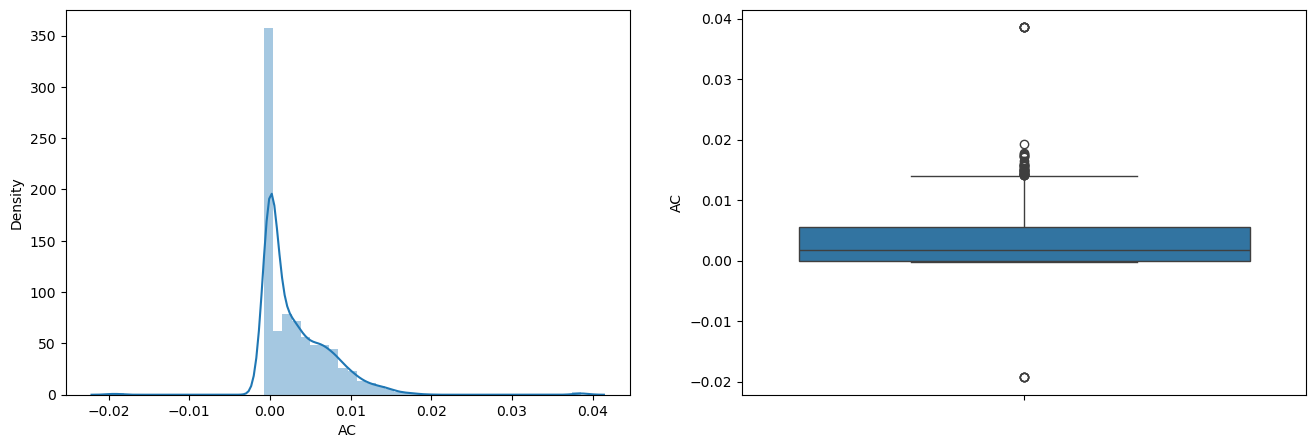

In [15]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.AC)

plt.subplot(1,2,2)
sns.boxplot(df_clean.AC)

<Axes: ylabel='FM'>

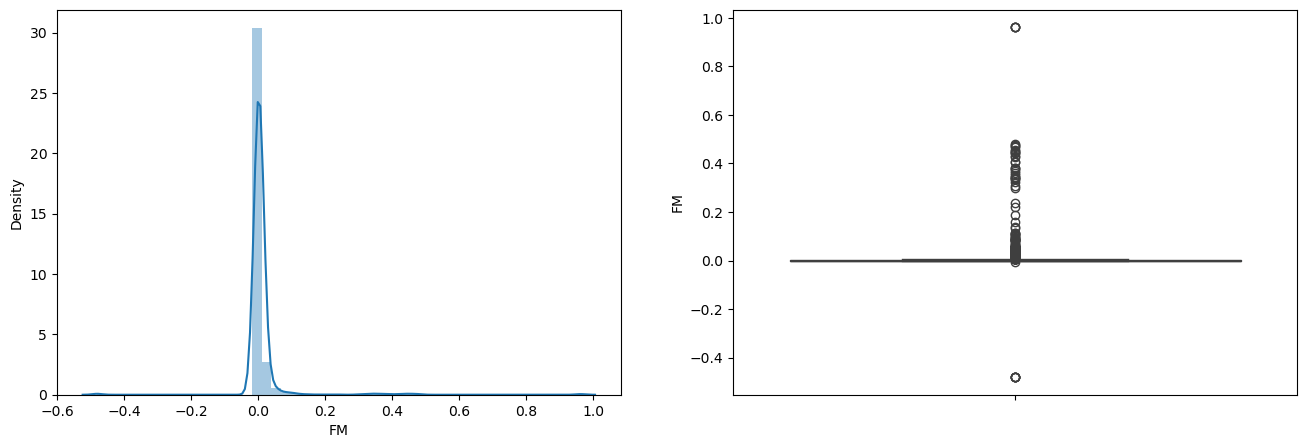

In [16]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.FM)

plt.subplot(1,2,2)
sns.boxplot(df_clean.FM)

<Axes: ylabel='UC'>

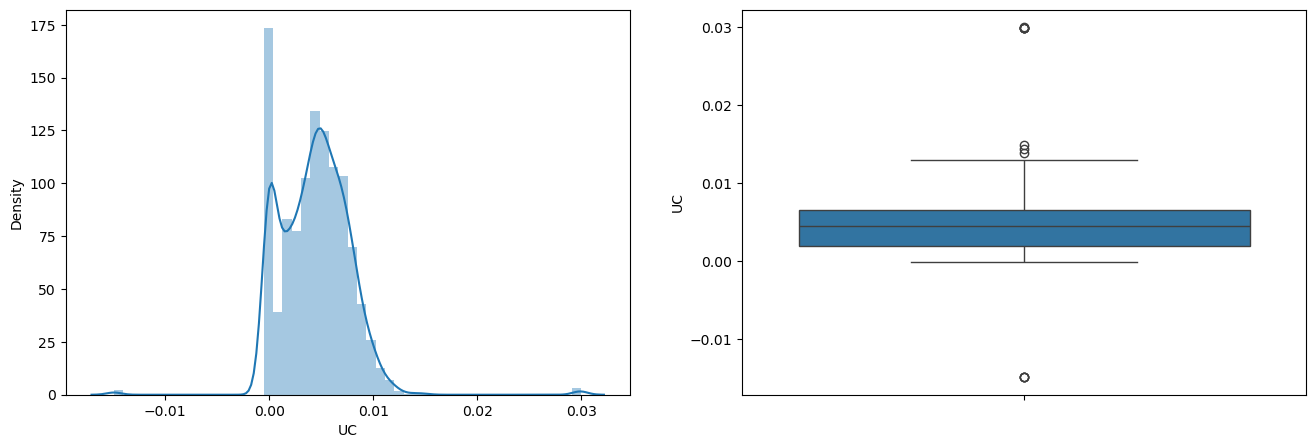

In [17]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.UC)

plt.subplot(1,2,2)
sns.boxplot(df_clean.UC)

<Axes: ylabel='DL'>

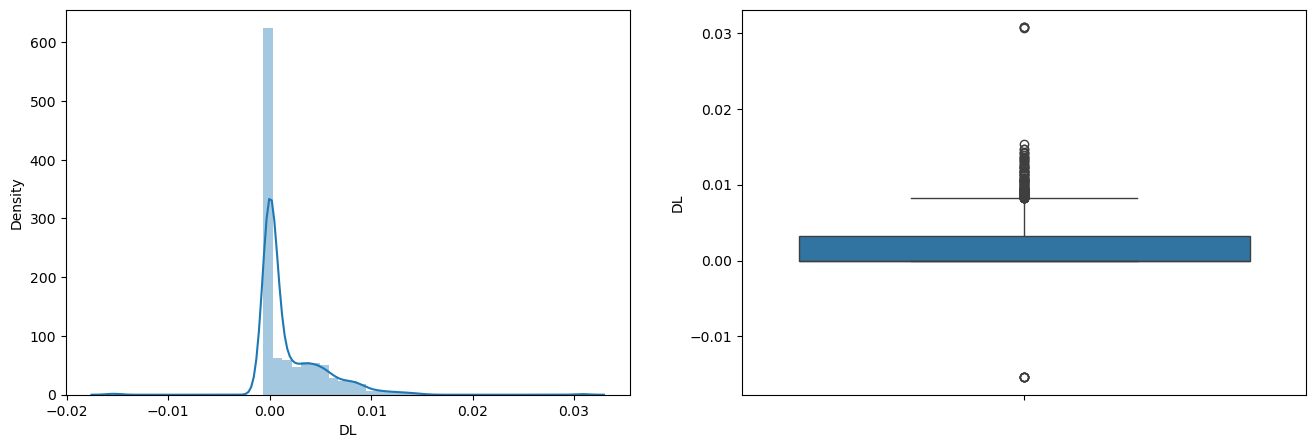

In [18]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.DL)

plt.subplot(1,2,2)
sns.boxplot(df_clean.DL)

<Axes: ylabel='DS'>

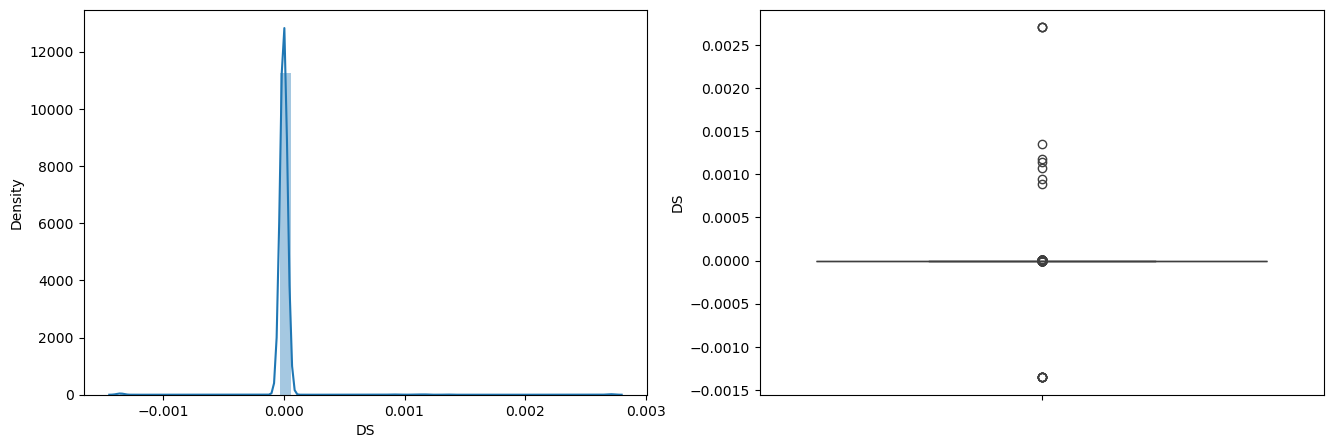

In [19]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.DS)

plt.subplot(1,2,2)
sns.boxplot(df_clean.DS)

<Axes: ylabel='DP'>

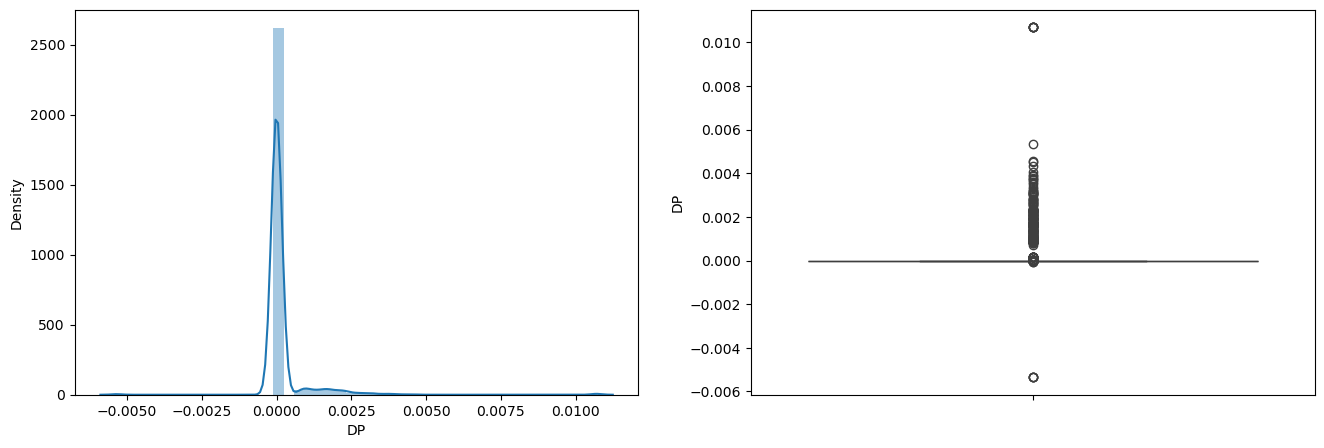

In [20]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.DP)

plt.subplot(1,2,2)
sns.boxplot(df_clean.DP)

<Axes: ylabel='ASTV'>

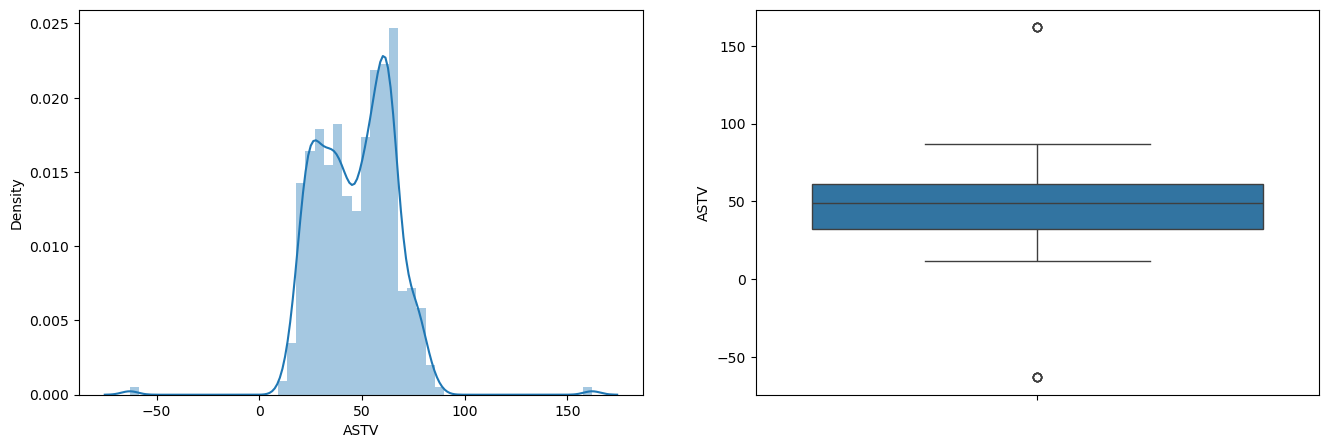

In [21]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.ASTV)

plt.subplot(1,2,2)
sns.boxplot(df_clean.ASTV)

<Axes: ylabel='MSTV'>

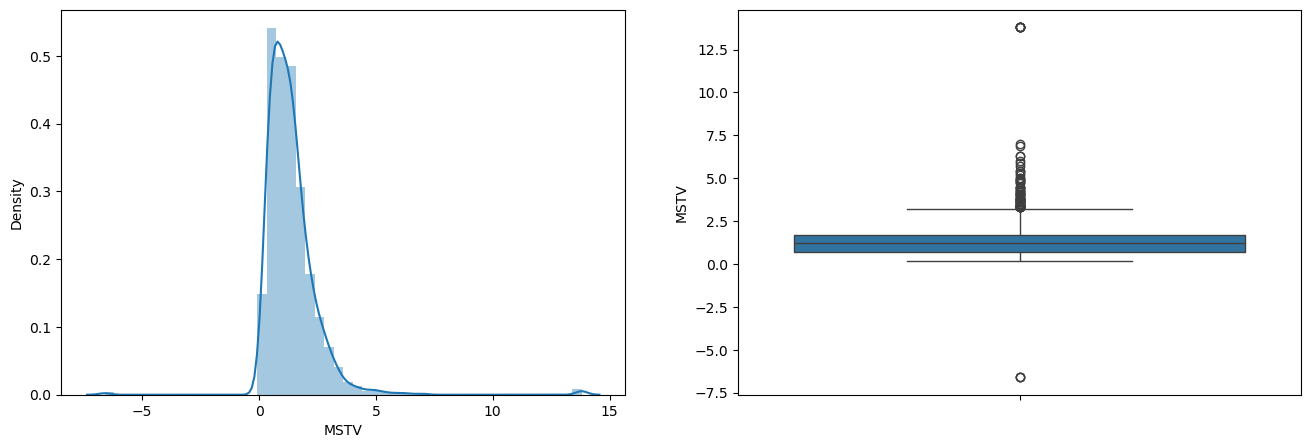

In [22]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.MSTV)

plt.subplot(1,2,2)
sns.boxplot(df_clean.MSTV)

<Axes: ylabel='Width'>

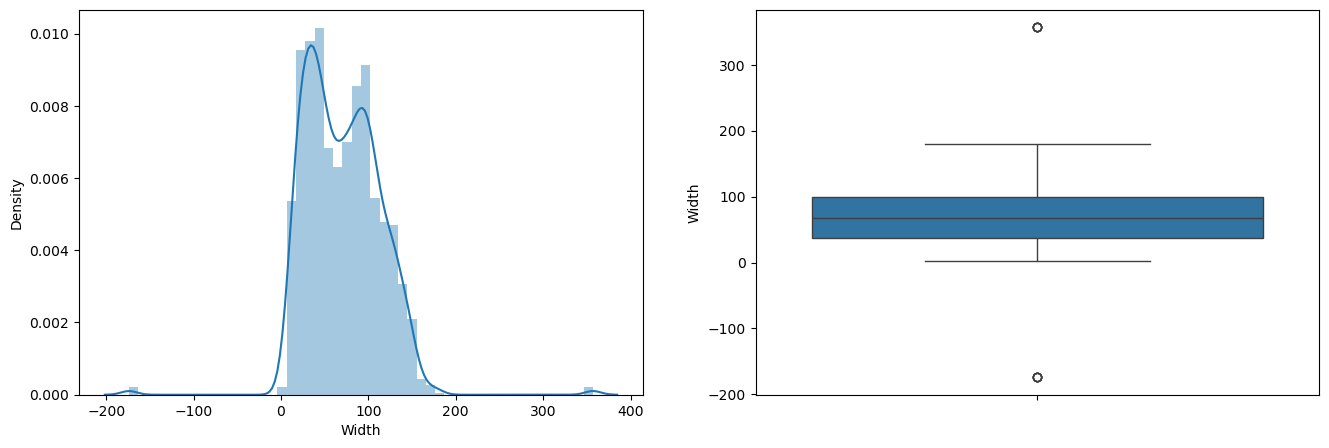

In [23]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.Width)

plt.subplot(1,2,2)
sns.boxplot(df_clean.Width)

<Axes: ylabel='Tendency'>

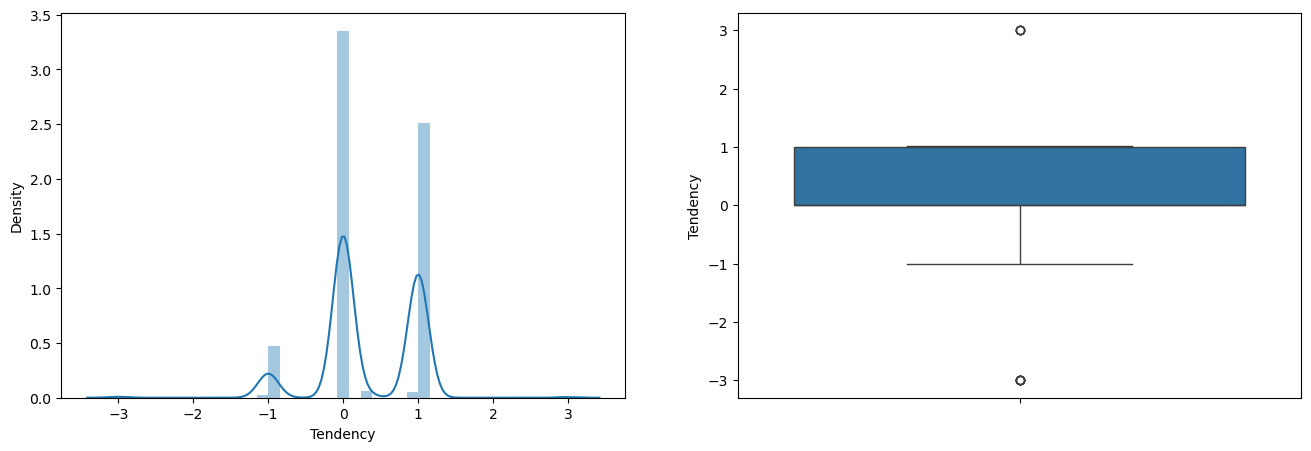

In [24]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.Tendency)

plt.subplot(1,2,2)
sns.boxplot(df_clean.Tendency)

<Axes: ylabel='NSP'>

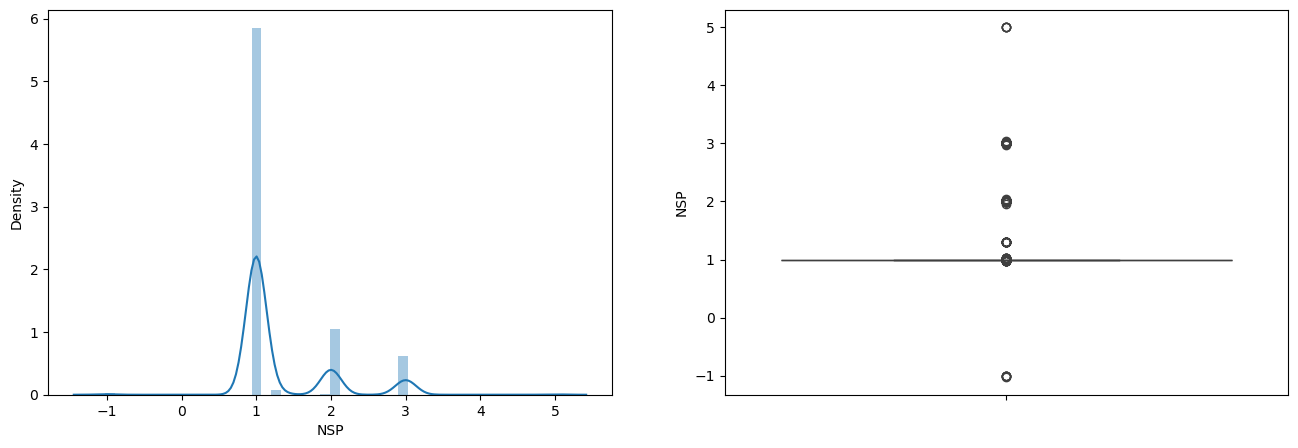

In [25]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean.NSP)

plt.subplot(1,2,2)
sns.boxplot(df_clean.NSP)

# Dealing with outliers
Using __IQR__ method</br>

if outlier found then __replace__ it by:</br>
    below 25% quantile --> lower limit of 25% quantile value as `lower_limit`</br>
    above 75% quantile --> upper limit of 75% quantile value as `upper_limit`


In [26]:
quantile_25 = df_clean['LB'].quantile(0.25)
quantile_75 = df_clean['LB'].quantile(0.75)
    # quantile_75, quantile_25
    
iqr = quantile_75 - quantile_25
    
upper_limit = quantile_75 + 1.5*iqr
lower_limit = quantile_25 - 1.5*iqr
print(lower_limit, upper_limit)
df_clean[(df_clean.LB>lower_limit) & (df_clean.LB<upper_limit)].reset_index()

105.0 161.0


,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2119,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2110,2120,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2111,2121,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2112,2122,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [27]:
for i in df_clean.columns:
    quantile_25 = df_clean[i].quantile(0.25)
    quantile_75 = df_clean[i].quantile(0.75)
    # quantile_75, quantile_25
    
    iqr = quantile_75 - quantile_25
    if iqr != 0:
        upper_limit = quantile_75 + 1.5*iqr
        lower_limit = quantile_25 - 1.5*iqr
        df_clean = df_clean[(df_clean[i]>lower_limit) & (df_clean[i]<upper_limit)]
        
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(['index'],axis=1)
df_clean

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.000000,0.0,1.000000
1,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.000000,0.0,1.000000
2,122.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,83.0,0.5,6.0,15.6,69.920261,1.0,3.000000
3,122.0,0.000000,0.0,0.002967,0.000000,0.0,0.0,86.0,0.3,6.0,10.6,68.000000,1.0,3.000000
4,124.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,86.0,0.4,14.0,4.8,24.000000,-1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,140.0,0.000000,0.0,0.006764,0.001127,0.0,0.0,79.0,0.6,27.0,6.4,26.000000,1.0,1.000000
1295,140.0,0.000000,0.0,0.004975,0.001244,0.0,0.0,77.0,0.7,17.0,6.0,31.000000,0.0,1.000000
1296,140.0,0.000775,0.0,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.000000,1.0,2.000000
1297,140.0,0.000980,0.0,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.000000,1.0,1.990464


# Scatter plot or corr

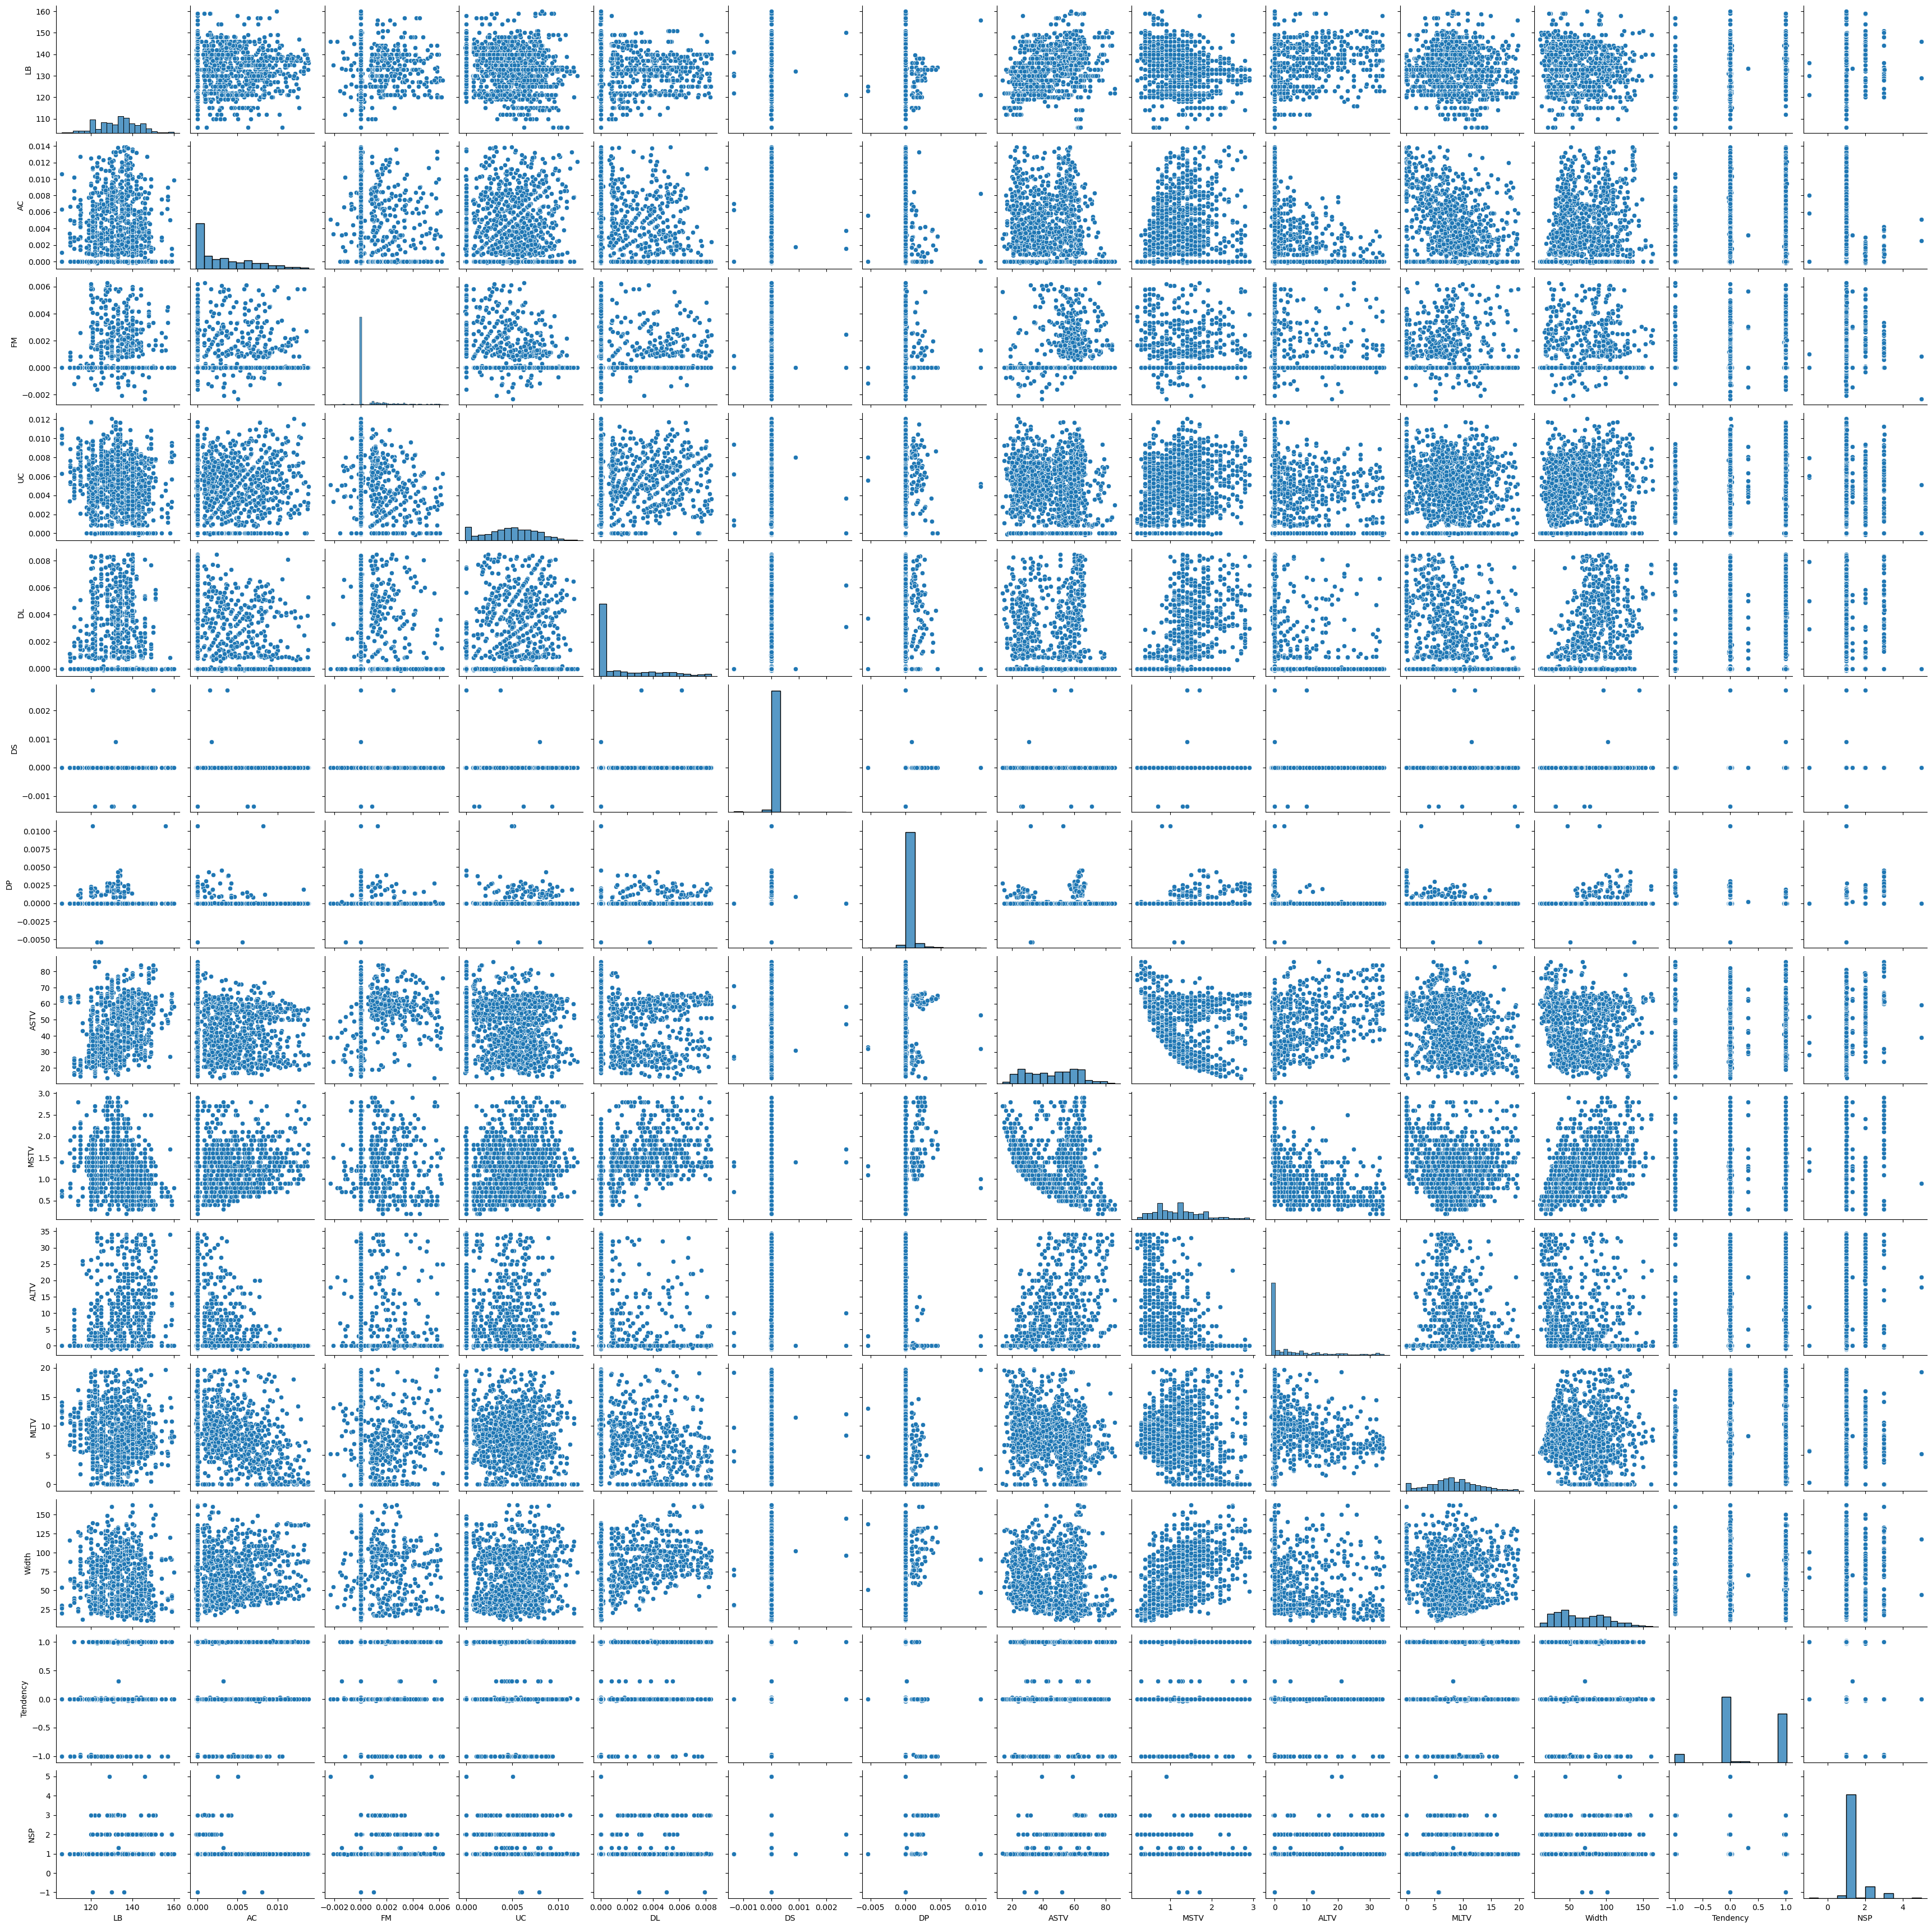

In [28]:
sns.pairplot(df_clean)

In [29]:
df_clean.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.037298,0.016770,-0.091789,-0.065953,0.014200,-0.034188,0.335778,-0.311751,0.259313,-0.075487,-0.032115,0.260799,0.192076
AC,-0.037298,1.000000,0.030965,0.088884,-0.094412,-0.021837,-0.085446,-0.161956,0.212162,-0.367961,-0.301539,0.252415,-0.012519,-0.286012
FM,0.016770,0.030965,1.000000,-0.240073,0.058007,0.021129,0.028735,0.349555,0.057897,-0.018721,-0.095525,0.115802,0.029048,0.054969
UC,-0.091789,0.088884,-0.240073,1.000000,0.226659,-0.023308,0.042445,-0.139985,0.228761,-0.211084,-0.108481,0.062054,-0.035757,-0.136610
DL,-0.065953,-0.094412,0.058007,0.226659,1.000000,0.059130,0.157303,-0.012021,0.542663,-0.208707,-0.301163,0.539986,0.236546,0.004748
DS,0.014200,-0.021837,0.021129,-0.023308,0.059130,1.000000,0.005766,0.009621,0.022518,0.002325,0.007940,0.070735,0.032368,0.028904
DP,-0.034188,-0.085446,0.028735,0.042445,0.157303,0.005766,1.000000,0.096305,0.213245,-0.094057,-0.196160,0.197777,-0.155158,0.384819
ASTV,0.335778,-0.161956,0.349555,-0.139985,-0.012021,0.009621,0.096305,1.000000,-0.373852,0.308752,-0.286389,-0.049161,0.030364,0.374855
MSTV,-0.311751,0.212162,0.057897,0.228761,0.542663,0.022518,0.213245,-0.373852,1.000000,-0.464639,-0.138123,0.578834,0.017332,-0.049795
ALTV,0.259313,-0.367961,-0.018721,-0.211084,-0.208707,0.002325,-0.094057,0.308752,-0.464639,1.000000,-0.031067,-0.266456,0.040310,0.251199
